In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [6]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.shape

(10000, 11)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
dataset.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [10]:
dataset.duplicated().any()

False

In [11]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
dataset['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


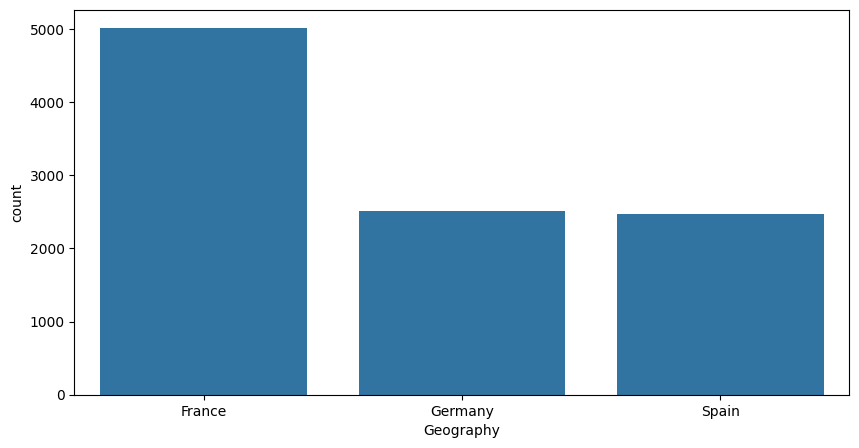

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x=dataset['Geography'].value_counts().index, y=dataset['Geography'].value_counts())
plt.show()

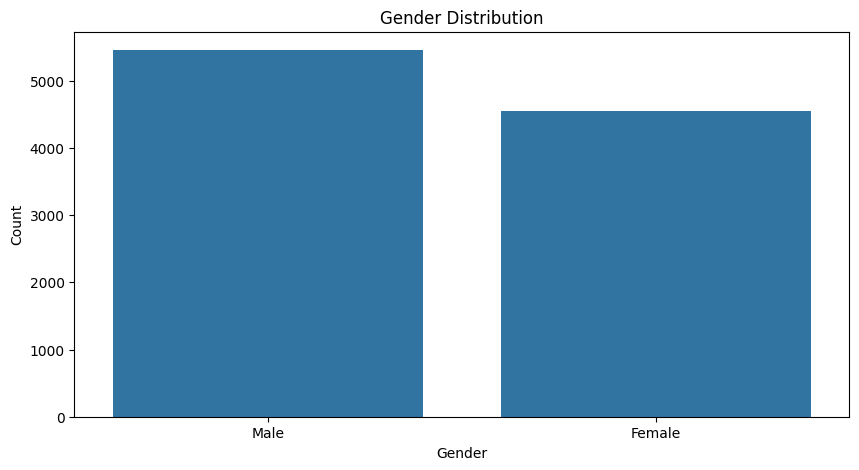

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=dataset['Gender'].value_counts().index, y=dataset['Gender'].value_counts())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [16]:
dataset['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [17]:
dataset.groupby(['Geography', 'Gender']).Balance.mean().sort_values(ascending=False)

Geography  Gender
Germany    Male      120259.668222
           Female    119145.966471
France     Male       63546.284875
Spain      Male       63352.833746
France     Female     60322.670159
Spain      Female     59862.092534
Name: Balance, dtype: float64

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [19]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [20]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [22]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))

[[1054  536]
 [ 453 1143]]
accuracy: 0.689579409918393
precision: 0.680762358546754
f1_score: 0.6980152671755725
recall_score: 0.7161654135338346


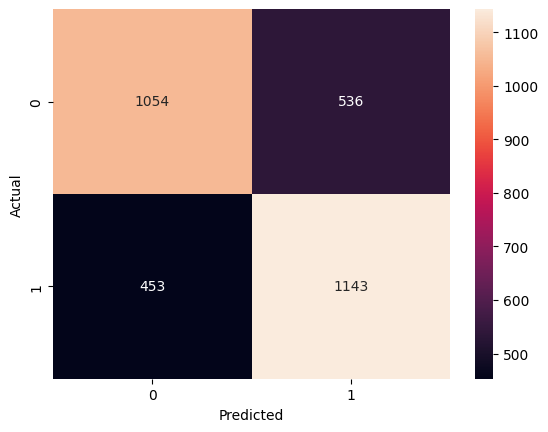

In [38]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion= 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred_rf = rf.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [41]:
cm_rf= confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print('accuracy:', accuracy_score(y_test, y_pred_rf))
print('precision:', precision_score(y_test, y_pred_rf))
print('f1_score:', f1_score(y_test, y_pred_rf))
print('recall_score:', recall_score(y_test, y_pred_rf))

[[1492   98]
 [ 192 1404]]
accuracy: 0.9089767733835531
precision: 0.9347536617842876
f1_score: 0.9063912201420272
recall_score: 0.8796992481203008


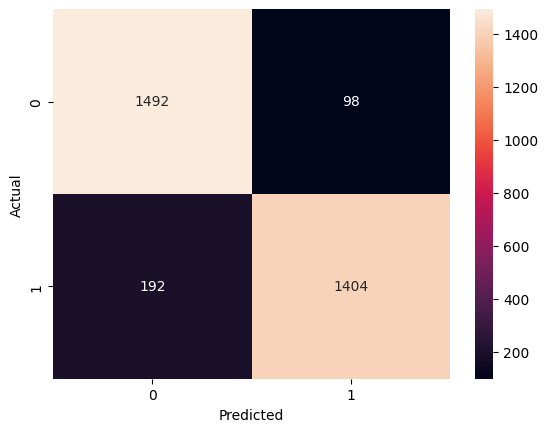

In [42]:
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()